# 컨볼루션 신경망(Convolution Neural Network, CNN)

## 주요 레이어

### Conv2D

- `tensorflow.keras.layers.Conv2D`

- `tf.nn.conv2d`

In [48]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Conv2D

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

import numpy as np
from sklearn.datasets import load_sample_image

In [49]:
china = load_sample_image('china.jpg') / 255

print(china.dtype)
print(china.shape)

float64
(427, 640, 3)


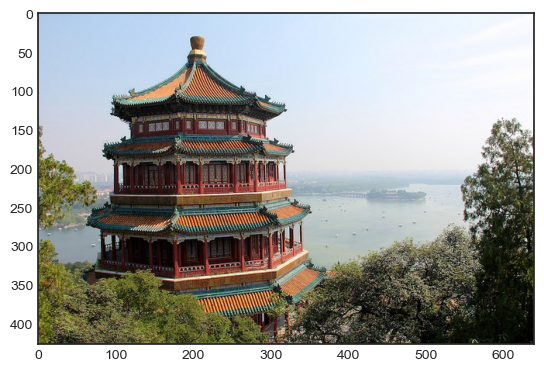

In [50]:
plt.imshow(china)

plt.show()

In [51]:
flower = load_sample_image('flower.jpg') / 255

print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


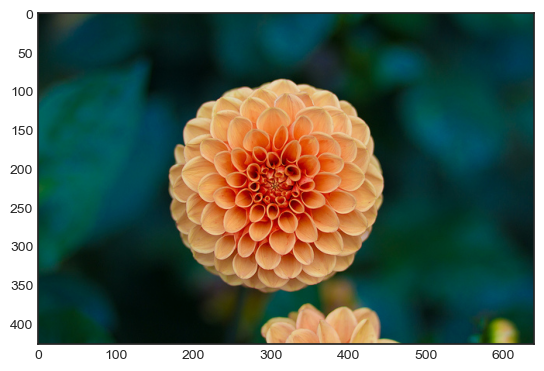

In [52]:
plt.imshow(flower)

plt.show()

In [53]:
imgs = np.array([china, flower])
batch_size, height, width, channels = imgs.shape

print(imgs.shape)

(2, 427, 640, 3)


In [54]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # 세로선 감지
filters[3, :, :, 1] = 1 # 가로선 감지

print(filters.shape)

(7, 7, 3, 2)


(2, 427, 640, 2)


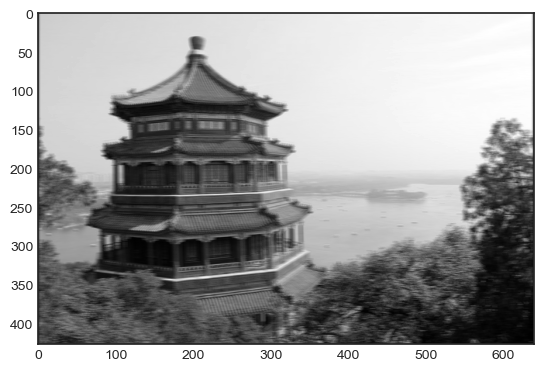

In [55]:
outputs = tf.nn.conv2d(imgs, filters, strides=1, padding='SAME') # 입력 크기와 출력 크기가 같도록 padding

print(outputs.shape)

plt.imshow(outputs[0, :, :, 1], cmap='gray')

plt.show()

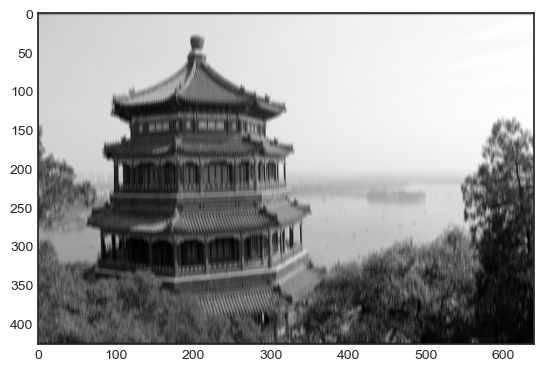

In [56]:
plt.imshow(outputs[0, :, :, 0], cmap='gray')

plt.show()

In [57]:
conv = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')

### MaxPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.max_pool`
  - 사용자가 사이즈를 맞춰줘야함
  - 케라스의 모델의 층으로 사용하고 싶으면 Lambda층으로 감싸줘야함

- 케라스 고수준 API
  - `keras.layers.MaxPool2D`


In [58]:
from keras.layers import MaxPool2D, Lambda

In [59]:
output = tf.nn.max_pool(imgs, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding='VALID')

In [60]:
output_keras = Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding='VALID')
)

In [61]:
max_pool = MaxPool2D(pool_size=2)

In [62]:
flower = load_sample_image('flower.jpg') / 255

print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


In [63]:
flower = np.expand_dims(flower, axis=0)

flower.shape

(1, 427, 640, 3)

In [64]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output = MaxPool2D(pool_size=2)(output)

output.shape

TensorShape([1, 213, 320, 32])

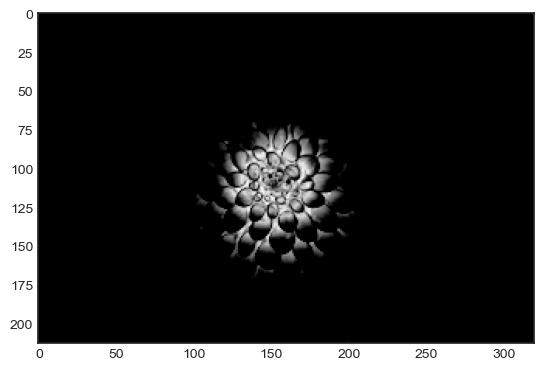

In [65]:
plt.imshow(output[0, :, :, 4], cmap='gray')

plt.show()

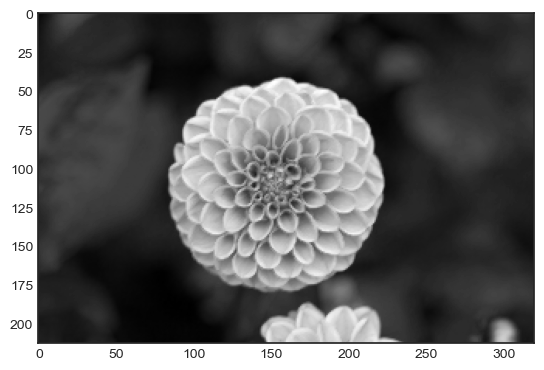

In [66]:
plt.imshow(output[0, :, :, 8], cmap='gray')

plt.show()

### AvgPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.avg_pool`

- 케라스 고수준 API
  - `keras.layers.AvgPool2D`

In [67]:
from keras.layers import AvgPool2D

In [68]:
flower.shape

(1, 427, 640, 3)

In [69]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output = AvgPool2D(pool_size=2)(output)

output.shape

TensorShape([1, 213, 320, 32])

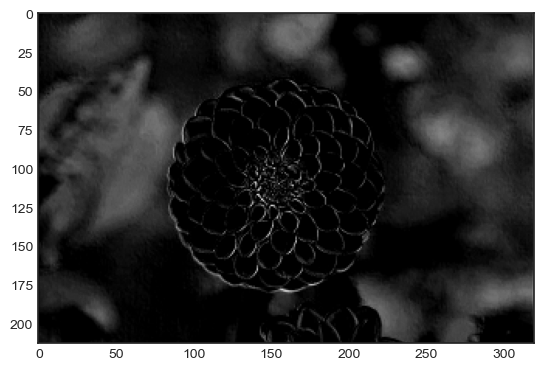

In [70]:
plt.imshow(output[0, :, :, 2], cmap='gray')

plt.show()

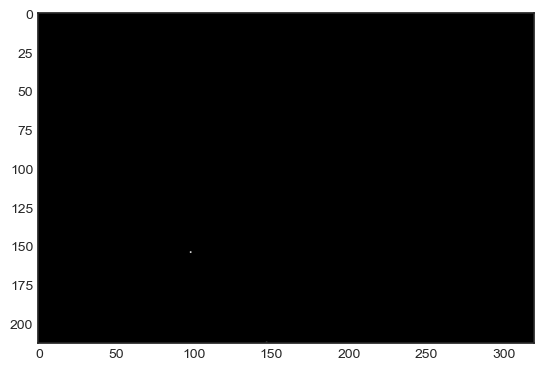

In [71]:
plt.imshow(output[0, :, :, 8], cmap='gray')

plt.show()

### GlobalAvgPool2D (전역 평균 풀링 층)

- `keras.layers.GlobalAvgPool2D()`

- 특징 맵 각각의 평균값을 출력하는 것이므로, 특성맵에 있는 대부분의 정보를 잃음

- 출력층에는 유용할 수 있음

In [72]:
from keras.layers import GlobalAvgPool2D

In [73]:
flower.shape

(1, 427, 640, 3)

In [74]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output = GlobalAvgPool2D()(output)

output.shape

TensorShape([1, 32])